# Ejercicio 4 barras (ejemplo)

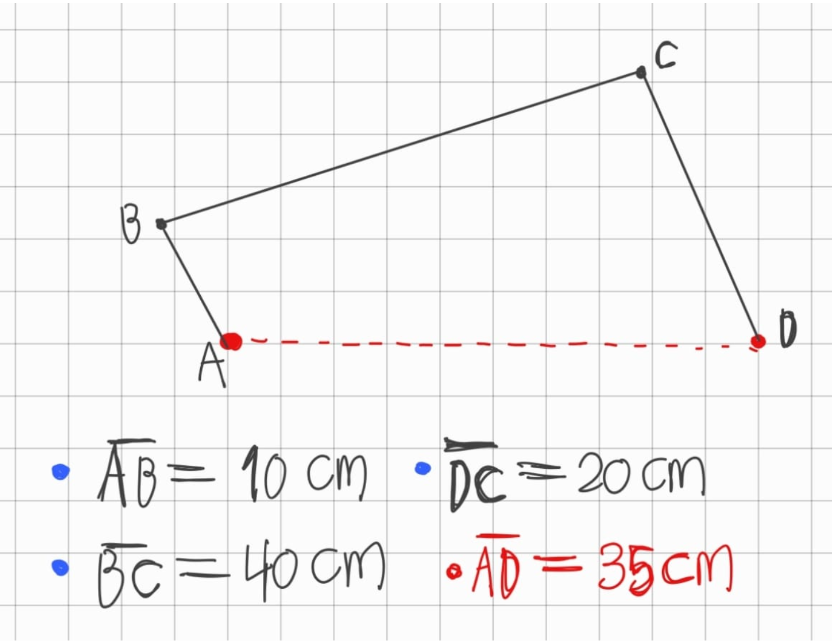

### ¿Cuantos grados de libertad tiene?

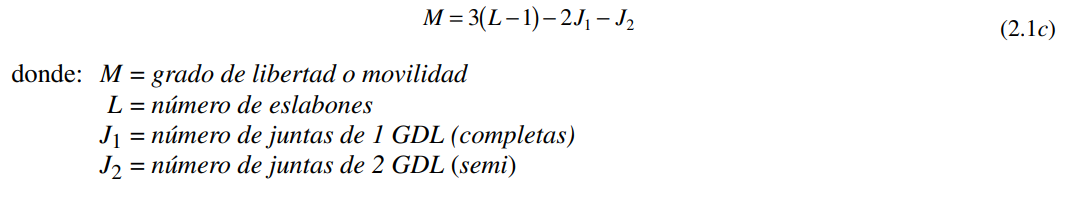

## Cálculo de grados de libertad
Voy a usar la fomrula simplificada de Kutzbach
$$M=3(L)-2(J)$$
En este caso:
* $L=3$
* $J=4$
* No hay medias uniones pues no hay sliders luego
$$M = 3(3)-2(4+0)=1 DOF$$

In [44]:
import numpy as np
from numpy import deg2rad
from sympy import symbols, pi, sin, cos, lambdify, solve
from sympy.physics.mechanics import ReferenceFrame, dynamicsymbols
from scipy import optimize
from scipy.optimize import fsolve
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

In [24]:
import numpy as np
from matplotlib.textpath import TextPath
from matplotlib.font_manager import FontProperties

### 1. Cinematica Directa 

grafique el PUNTO C en coordenadas X y Y, cuando la entrada del sistema esta dado por: 

$$
\theta(t) = \pi/2 ( 1 + \sin(5t))
$$



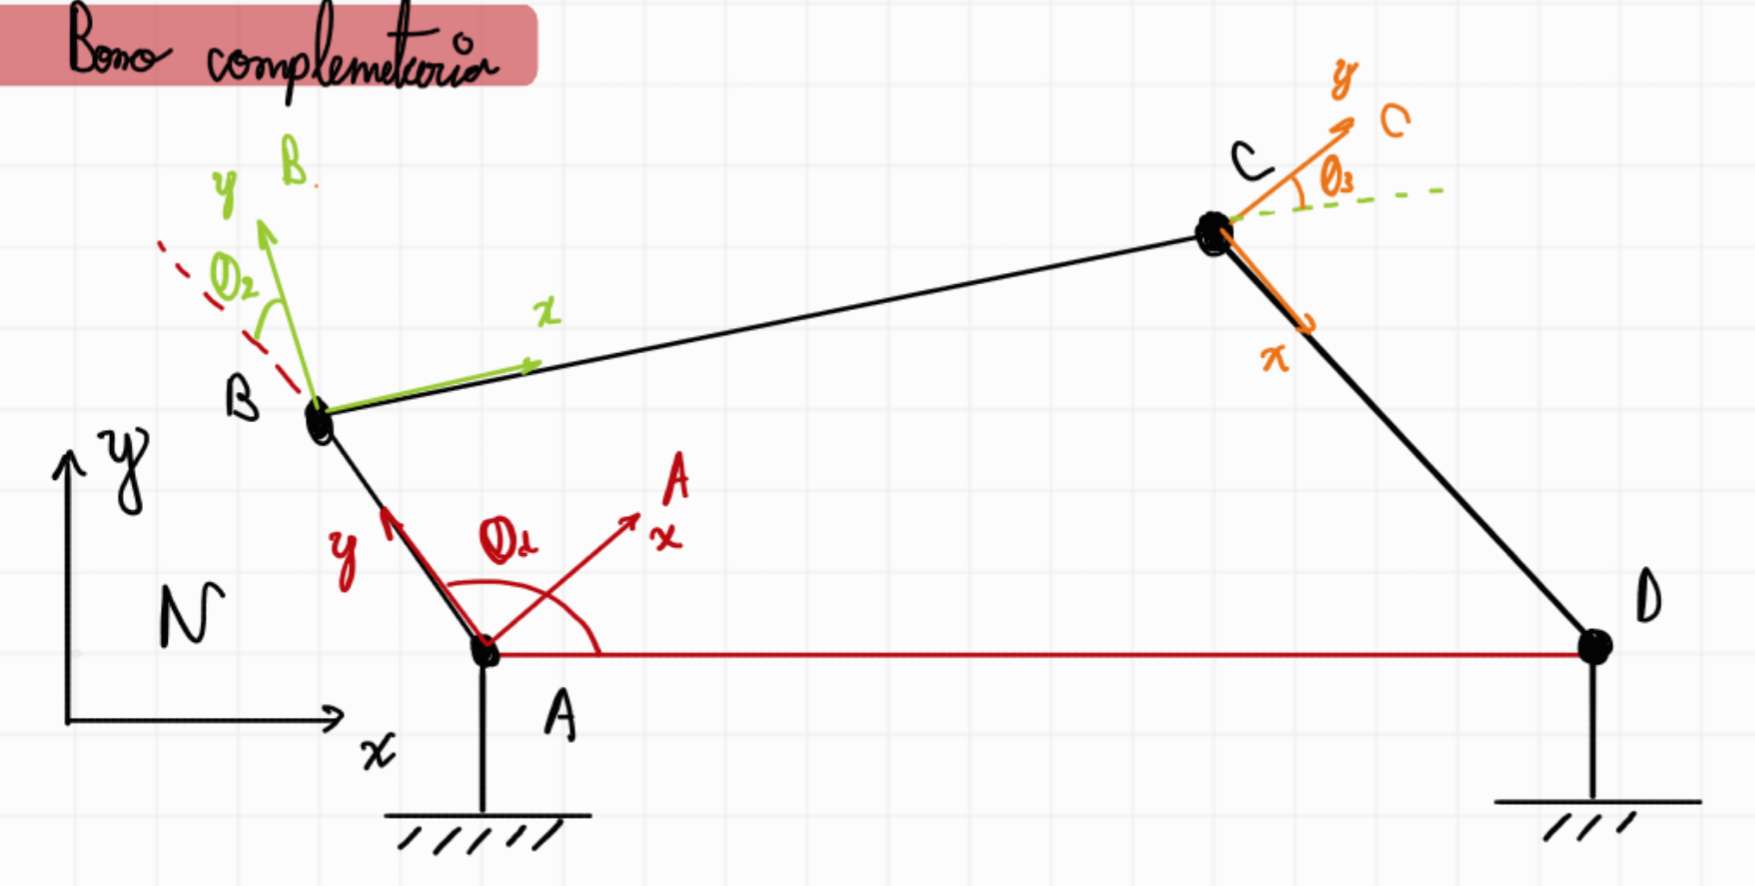

In [25]:
# Primero definimos los simbolos
AB, BC, CD, DA = symbols('AB BC CD DA')
theta1, theta2, theta3 = dynamicsymbols('theta1 theta2 theta3')

N = ReferenceFrame('N')
A = N.orientnew('A', 'Axis', [theta1-(pi/2), N.z])
B = A.orientnew('B', 'Axis', [-theta2, A.z])
C = B.orientnew('C', 'Axis', [-theta3, B.z])

params = {AB: 10, BC: 40, CD: 20, DA: 35}

r1 = AB*A.y
r2 = BC*B.x
r3 = CD*C.x
r4 = -DA*N.x

eqLoop = r1+r2+r3+r4

eqParams = eqLoop.subs(params)

eq_fun = lambdify(
    [theta1, theta2, theta3],
    [eqParams.dot(N.x), eqParams.dot(N.y)]
)

display(eqLoop)
display(eqParams)
display([eqParams.dot(N.x), eqParams.dot(N.y)])

- DA*N.x + AB*A.y + BC*B.x + CD*C.x

- 35*N.x + 10*A.y + 40*B.x + 20*C.x

[-20*(sin(theta1(t))*sin(theta2(t)) + cos(theta1(t))*cos(theta2(t)))*sin(theta3(t)) + 20*(sin(theta1(t))*cos(theta2(t)) - sin(theta2(t))*cos(theta1(t)))*cos(theta3(t)) + 40*sin(theta1(t))*cos(theta2(t)) - 40*sin(theta2(t))*cos(theta1(t)) + 10*cos(theta1(t)) - 35,
 20*(-sin(theta1(t))*sin(theta2(t)) - cos(theta1(t))*cos(theta2(t)))*cos(theta3(t)) - 20*(sin(theta1(t))*cos(theta2(t)) - sin(theta2(t))*cos(theta1(t)))*sin(theta3(t)) - 40*sin(theta1(t))*sin(theta2(t)) + 10*sin(theta1(t)) - 40*cos(theta1(t))*cos(theta2(t))]

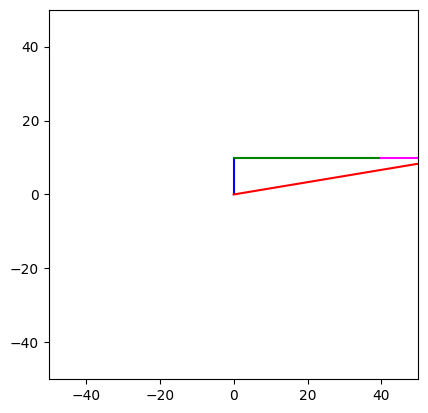

In [26]:
points={'A':0*N.x+0*N.y,'B':r1,'C':r1+r2,'D':r1+r2+r3}
points_fun={k:lambdify([theta1,theta2,theta3],[v.dot(N.x).subs(params),v.dot(N.y).subs(params)]) for k,v in points.items()}
# Esta función de aquí se ve complicada, pero en realidad es bastante bonita, entonces esta función
# se encarga de crear un diccionario de funciones numéricas para cada punto del mecanismo
# Cada función recibe los ángulos y la posición x de OR y devuelve las coordenadas x e y del punto correspondiente

def plotMechanism(joint_values,ax=None):    
    A=points_fun['A'](*joint_values) # Operador de unpacking, es decir, toma la lista de joint_values y los pasa como argumentos a la función de cada punto
    B=points_fun['B'](*joint_values)
    C=points_fun['C'](*joint_values)
    D=points_fun['D'](*joint_values)
    if ax is None:
        ax=plt.figure().add_subplot(111)
    ax.plot([A[0],B[0]], [A[1],B[1]], 'BLUE')
    ax.plot([B[0],C[0]], [B[1],C[1]], 'GREEN')
    ax.plot([C[0],D[0]], [C[1],D[1]], 'magenta')
    ax.plot([D[0],A[0]], [D[1],A[1]], 'red')
    ax.set_aspect('equal')
    ax.set_xlim(-50,50.0)
    ax.set_ylim(-50,50.0)

# Example with some arbitrary joint values

plotMechanism([np.deg2rad(90),np.deg2rad(0),np.deg2rad(0)])


In [27]:
def plotMechanismPlus(joint_values, ax=None):    
    A = points_fun['A'](*joint_values)
    B = points_fun['B'](*joint_values)
    C = points_fun['C'](*joint_values)
    D = points_fun['D'](*joint_values)

    if ax is None:
        ax = plt.figure().add_subplot(111)

    # Dibuja enlaces
    ax.plot([A[0], B[0]], [A[1], B[1]], color='blue', linewidth=2)
    ax.plot([B[0], C[0]], [B[1], C[1]], color='green', linewidth=2)
    ax.plot([C[0], D[0]], [C[1], D[1]], color='magenta', linewidth=2)
    ax.plot([D[0], A[0]], [D[1], A[1]], color='red', linewidth=2)

    # Ejes
    ax.axhline(0, color='black', linewidth=1)
    ax.axvline(0, color='black', linewidth=1)

    # Grilla fina de 1 unidad
    ax.set_xticks(range(-50, 51, 1), minor=True)
    ax.set_yticks(range(-50, 51, 1), minor=True)
    ax.grid(which='minor', color='gray', linestyle='--', linewidth=0.5)

    # Ticks “grandes” cada 5 unidades
    ax.set_xticks(range(-50, 51, 5), minor=False)
    ax.set_yticks(range(-50, 51, 5), minor=False)
    ax.grid(which='major', color='black', linestyle='-', linewidth=0.7)
    
    ax.tick_params(axis='both', which='major', labelsize=5)  # números grandes
    ax.tick_params(axis='both', which='minor', labelsize=5)  # números pequeños (si tienes)


    ax.set_aspect('equal')
    ax.set_xlim(-50, 50)
    ax.set_ylim(-50, 50)


(array([-1.03072457,  2.39092589]),
 {'nfev': 18,
  'fjac': array([[ 0.01667707,  0.99986093],
         [-0.99986093,  0.01667707]]),
  'r': array([-23.1864628 ,   5.76177375,  23.53347478]),
  'qtf': array([ 3.79545945e-11, -5.18265009e-11]),
  'fvec': array([4.26325641e-14, 2.66453526e-14])},
 1,
 'The solution converged.')

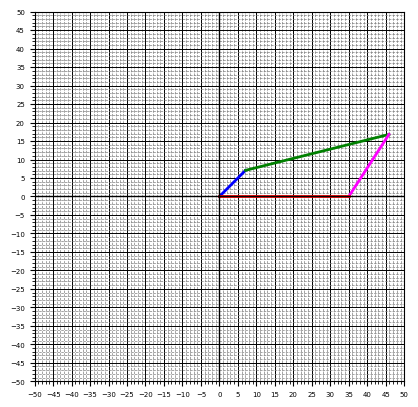

In [28]:
q0 = [deg2rad(45)]

# Solve the vector loop equation for a known theta1 and x.
fsolve_fun=lambda z: eq_fun(q0[0],z[0],z[1])
z0=[np.deg2rad(20),np.deg2rad(20)]
out=fsolve(fsolve_fun,z0,full_output=True)

plotMechanismPlus([q0[0],out[0][0],out[0][1]])

out

In [29]:
tList=np.linspace(0,10,100) # Tiempo de 0 a 10 segundos, con 100 puntos
theta1List=(np.pi/2)*(1+np.sin(5*tList))
# display(theta1List) < Me sacaba error por usar py de sympy
z0=[np.deg2rad(20),np.deg2rad(20)]
zList=[] # Lista de soluciones para theta2 y theta3
for i,ti in enumerate(tList):
    fsolve_fun=lambda z: eq_fun(theta1List[i],z[0],z[1])    
    out=fsolve(fsolve_fun,z0,full_output=True)    
    zList.append(out[0])
    z0=out[0]
    
display(zList)

[array([-0.24316887,  2.0063087 ]),
 array([0.44543635, 1.69155118]),
 array([0.92046832, 1.56776422]),
 array([1.10841168, 1.55517198]),
 array([0.98785231, 1.56048192]),
 array([0.5721989 , 1.64787669]),
 array([-0.07960925,  1.92403517]),
 array([-0.83796295,  2.30482338]),
 array([-1.54099504,  2.55731233]),
 array([-1.96176347,  2.60463854]),
 array([-1.86938899,  2.60147054]),
 array([-1.31997438,  2.49846191]),
 array([-0.57896892,  2.17797791]),
 array([0.16109041, 1.80944185]),
 array([0.74381532, 1.60021066]),
 array([1.06315489, 1.55596872]),
 array([1.0789351 , 1.55552483]),
 array([0.78942497, 1.59009223]),
 array([0.22999502, 1.77877831]),
 array([-0.50092857,  2.13832447]),
 array([-1.24921558,  2.47506062]),
 array([-1.83046941,  2.59895585]),
 array([-1.9775987 ,  2.60479556]),
 array([-1.60177418,  2.56944986]),
 array([-0.91482749,  2.3402471 ]),
 array([-0.15460035,  1.96145872]),
 array([0.51506182, 1.66675906]),
 array([0.95851051, 1.56328568]),
 array([1.11029188

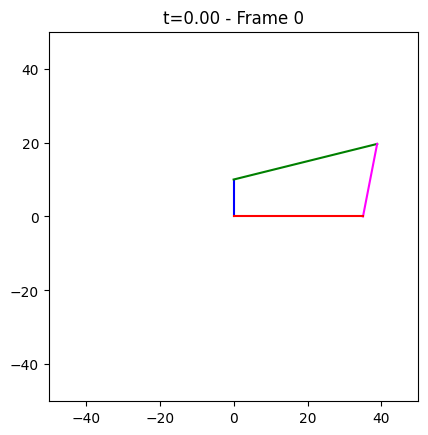

In [30]:
fig, ax = plt.subplots()

def update(i):
    ax.clear()
    plotMechanism([theta1List[i], zList[i][0], zList[i][1]], ax)
    ax.set_title(f"t={tList[i]:.2f} - Frame {i}")

anim = animation.FuncAnimation(fig, update, frames=len(tList), repeat=False, interval=100)

# Option 1: Display as JS animation
HTML(anim.to_jshtml())
# Option 2: Display as HTML5 video (slightly heavier)
# HTML(anim.to_html5_video())


In [31]:
# anim.save("mechanism_animation.gif", writer='pillow', fps=10)  # fps can be adjusted

### 2. Cinematica inversa 

¿cual es el valor de $\theta_1$ para que el punto C este en x = 35 cm y Y = 20 cm

¿se puede llegar al valor exacto?, Explique porqué



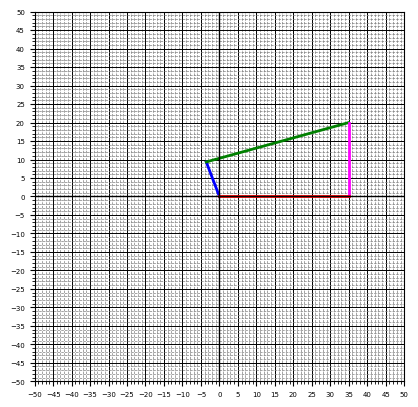

In [32]:
# El punto objetivo
le_point=np.array([35,20])
# Adivinanza origenal para q0
q0 = [deg2rad(45)]

def FK(q,z0=None):
    # Vuelvo el lambdify una función
    fsolve_fun=lambda z: eq_fun(q[0],z[0],z[1])
    # Esta es nuestra adivinanza inicial
    z0=[np.deg2rad(45),np.deg2rad(20)] if z0 is None else z0
    # Sacamos el fsolve además del output completo
    out=fsolve(fsolve_fun,z0,full_output=True)   
    return out[0],out

c_fun=points_fun['C'] # Función para graficar C

def IK_error(q,s_star):
    z,_=FK(q)   
    s=np.array(c_fun(q[0],z[0],z[1]))
    er=100*np.square(s-s_star).sum()    
    return er

def IK(s_star):
    q0=[np.deg2rad(64.43),0.70]
    res=minimize(lambda q: IK_error(q,s_star),q0)
    return res.x,res    

qstar,ik_out=IK(le_point)
zstar,fk_out=FK(qstar)
plotMechanismPlus([qstar[0],zstar[0],zstar[1]])

Si puede llegar al valor exacto, pues el valor esta dentro del espacio de trabajo de nuestro mecanismo, esto se puede ver facilmente pues las longitudes son apenas las necesarias para llegar cartesianamente a este punto.

## BONO : 
### DIBUJE LA PRIMERA LETRA DE SU NOMBRE UTILIZANDO LA PUNTA DEL ROBOT RRR

*Cada eslabon mide 10 cm*

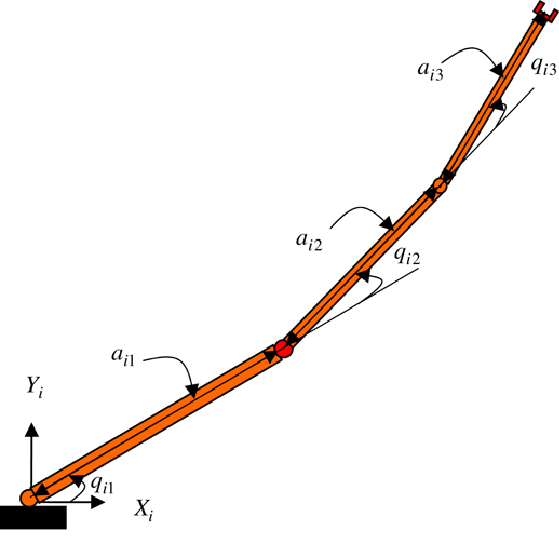

Análisis grados de libertad 

$$M=3(3)-2(3)=3 DOF$$

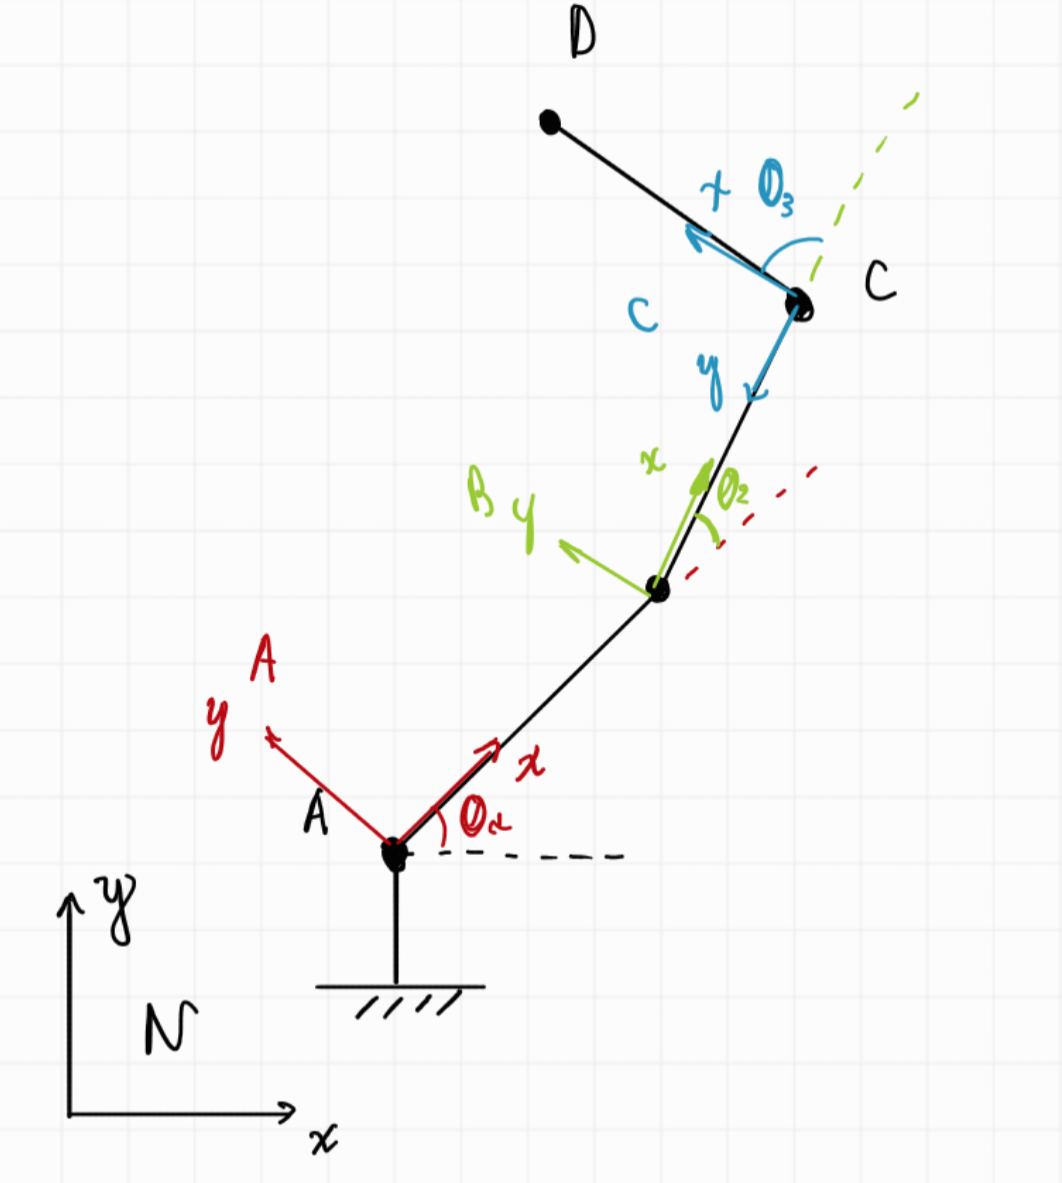

In [33]:
# Simbolos
AB, BC, CD= symbols('AB, BC, CD') 
# Simbolos dinámicos
theta1, theta2, theta3 = dynamicsymbols('theta1 theta2 theta3')
N = ReferenceFrame('N')
A = N.orientnew('A', 'Axis', [theta1, N.z])
B = A.orientnew('B', 'Axis', [theta2, N.z])
C = B.orientnew('C', 'Axis', [theta3, N.z])

params={AB:10,BC:10,CD:10}

r1 = AB*A.x
r2 = BC*B.x
r3 = CD*C.x

eqLoop = r1+r2+r3

eqParams = eqLoop.subs(params)

eq_fun = lambdify(
    [theta1, theta2, theta3],
    [eqParams.dot(N.x), eqParams.dot(N.y)]
)

display(eqLoop)
display(eqParams)
display([eqParams.dot(N.x), eqParams.dot(N.y)])



AB*A.x + BC*B.x + CD*C.x

10*A.x + 10*B.x + 10*C.x

[10*(-sin(theta1(t))*sin(theta2(t)) + cos(theta1(t))*cos(theta2(t)))*cos(theta3(t)) + 10*(-sin(theta1(t))*cos(theta2(t)) - sin(theta2(t))*cos(theta1(t)))*sin(theta3(t)) - 10*sin(theta1(t))*sin(theta2(t)) + 10*cos(theta1(t))*cos(theta2(t)) + 10*cos(theta1(t)),
 10*(-sin(theta1(t))*sin(theta2(t)) + cos(theta1(t))*cos(theta2(t)))*sin(theta3(t)) + 10*(sin(theta1(t))*cos(theta2(t)) + sin(theta2(t))*cos(theta1(t)))*cos(theta3(t)) + 10*sin(theta1(t))*cos(theta2(t)) + 10*sin(theta1(t)) + 10*sin(theta2(t))*cos(theta1(t))]

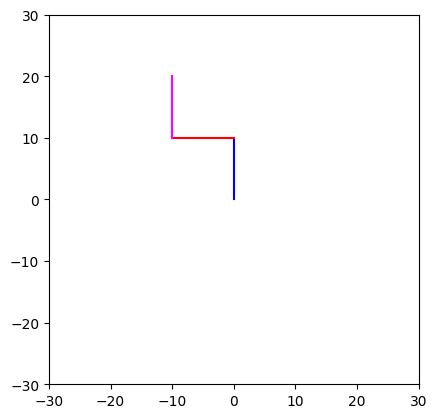

In [ ]:
points={'A':0*N.x,'B':r1,'C':r1+r2,'D':r1+r2+r3}
points_fun={k:lambdify([theta1,theta2,theta3],[v.dot(N.x).subs(params),v.dot(N.y).subs(params)]) for k,v in points.items()}
# Esta función de aquí se ve complicada, pero en realidad es bastante bonita, entonces esta función
# se encarga de crear un diccionario de funciones numéricas para cada punto del mecanismo
# Cada función recibe los ángulos y la posición x de OR y devuelve las coordenadas x e y del punto correspondiente

def plotMechanism(joint_values,ax=None):    
    A=points_fun['A'](*joint_values) # Operador de unpacking, es decir, toma la lista de joint_values y los pasa como argumentos a la función de cada punto
    B=points_fun['B'](*joint_values)
    C=points_fun['C'](*joint_values)
    D=points_fun['D'](*joint_values)
    if ax is None:
        ax=plt.figure().add_subplot(111)
    ax.plot([A[0],B[0]], [A[1],B[1]], 'BLUE')
    ax.plot([B[0],C[0]], [B[1],C[1]], 'red')
    ax.plot([C[0],D[0]], [C[1],D[1]], 'magenta')
    ax.set_aspect('equal')
    ax.set_xlim(-30,30)
    ax.set_ylim(-30,30)

# Example with some arbitrary joint values

plotMechanism([np.deg2rad(90),np.deg2rad(90),np.deg2rad(-90)])

#### Genial ahora toca cinemática inversa   

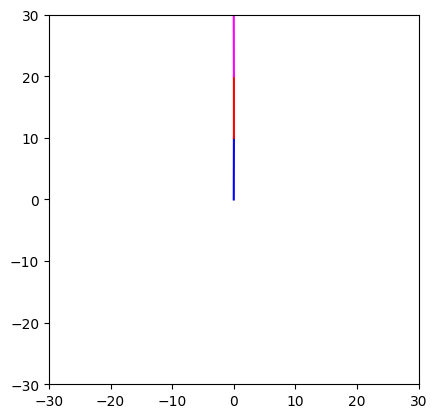

In [35]:
# Solve the vector loop equation for a known position of S.
le_point=np.array([0,30])
q0 = [np.deg2rad(0),np.deg2rad(0),np.deg2rad(0)]
# Propose a value for theta1 and x and solve for theta2 and theta3

def FK(q):
    out = eq_fun(q[0],q[1],q[2])  
    return out

d_fun=points_fun['D']    

def IK_error(q,le_point):
    er=100*np.square(FK(q)-le_point).sum()    
    return er

def IK(le_point):
    # res=minimize(lambda q: IK_error(q,le_point),q0)
    res=minimize(IK_error, args=(le_point), x0=q0)
    return res.x,res    

qstar,ik_out=IK(le_point)
# zstar=FK(qstar)

plotMechanism([qstar[0],qstar[1],qstar[2]])

In [36]:
s = np.linspace(0, 1, 100)  # parámetro de trayectoria
xList = 2 + 2*np.cos(2*np.pi*s)
yList = 20 + 2*np.sin(2*np.pi*s)

qList = []
q_seed = q0  # semilla inicial

for i in range(len(xList)):
    res = minimize(IK_error, args=(np.array([xList[i], yList[i]])), x0=q_seed)
    q = res.x
    qList.append(q)
    q_seed = q  # continuidad


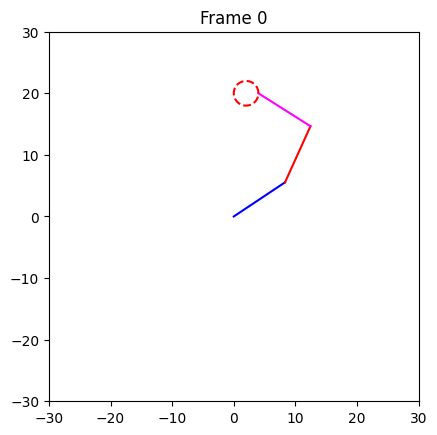

In [37]:
fig, ax = plt.subplots()

def update(i):
    ax.clear()
    plotMechanism(qList[i], ax)
    ax.plot(xList, yList, 'r--')
    ax.set_aspect('equal')
    ax.set_title(f"Frame {i}")

anim = animation.FuncAnimation(
    fig,
    update,
    frames=len(qList),
    interval=100,
    repeat=False
)

HTML(anim.to_jshtml())


In [38]:
def letter_trajectory(letter="Luis", scale=10.0, n_points=100):
    fp = FontProperties(family="DejaVu Sans", weight="bold")
    tp = TextPath((0, 0), letter, size=1, prop=fp)

    verts = tp.vertices.copy()

    # Normalizar
    verts -= verts.mean(axis=0)
    verts *= scale

    # Longitud de arco
    d = np.linalg.norm(np.diff(verts, axis=0), axis=1)
    s = np.insert(np.cumsum(d), 0, 0)
    s /= s[-1]  # normalizar a [0,1]

    # Re-muestreo uniforme
    s_new = np.linspace(0, 1, n_points)
    x_new = np.interp(s_new, s, verts[:, 0])
    y_new = np.interp(s_new, s, verts[:, 1])

    return x_new, y_new

xList, yList = letter_trajectory()

display(xList)
display(yList)

array([-13.77034867, -12.03081259, -11.89066117, -11.89066117,
       -11.89066117, -10.94298079,  -9.20344471,  -8.59066117,
       -10.03663728, -11.77617335, -13.51570943, -13.77034867,
       -13.77034867, -13.77034867, -13.77034867, -13.91443428,
       -14.13192699, -14.3494197 , -14.56691242, -13.95851582,
       -12.29129993, -10.62408405,  -8.95686817,  -7.53577836,
        -7.53577836,  -7.13896622,  -5.77796586,  -5.78583157,
        -5.68944482,  -4.24853337,  -3.78577836,  -3.78577836,
        -2.78962929,  -2.03734086,  -2.03734086,  -2.03734086,
        -2.77444673,  -3.78577836,  -5.12778274,  -6.75410929,
        -7.53577836,  -7.93683828,  -7.7931536 ,  -6.35940123,
        -4.92564885,  -3.49189647,  -2.0581441 ,  -0.62439172,
         1.05817239,   1.38961227,   1.38961227,   1.38961227,
         0.23165784,  -0.35726273,  -0.35726273,  -0.35726273,
        -0.49407158,  -0.75835905,  -1.02264652,  -1.1334398 ,
        -0.94215968,  -0.75087955,  -0.55959942,  -0.36

array([ 4.58625579,  4.58625579,  2.98687113,  1.24733506, -0.49220102,
       -1.28405671, -1.28405671, -2.41080925, -2.70436921, -2.70436921,
       -2.70436921, -1.21947238,  0.5200637 ,  2.25959978,  3.99913585,
        3.44288258,  1.71699652, -0.00888954, -1.73477559, -2.48685999,
       -1.99049625, -1.49413251, -0.99776877, -0.31787923,  1.42165685,
        2.76438079,  2.38584508,  0.64633644, -1.08080035, -1.3048997 ,
        0.2814577 ,  2.02099378,  2.76438079,  1.77713314,  0.03759707,
       -1.70193901, -2.70436921, -1.97616477, -2.84655671, -2.6013466 ,
       -1.14968754, -1.66797108, -2.34444152, -1.35938321, -0.37432489,
        0.61073342,  1.59579173,  2.58085005,  2.76438079,  1.35628459,
       -0.38325149, -2.12278756, -2.70436921, -1.55375371,  0.18578236,
        1.92531844,  1.87436041,  0.15501812, -1.56432416, -2.12182223,
       -0.39283476,  1.33615271,  3.06514018,  4.79412765,  4.89406829,
        3.46750579,  3.66525114,  4.38644638,  2.65745891,  0.92

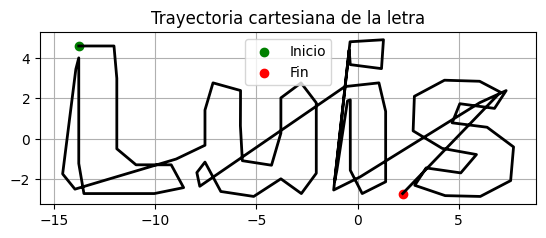

In [39]:
# Plot solo de la trayectoria
fig, ax = plt.subplots()
ax.plot(xList, yList, 'k-', linewidth=2)
ax.scatter(xList[0], yList[0], color='green', label='Inicio')
ax.scatter(xList[-1], yList[-1], color='red', label='Fin')

ax.set_aspect('equal')
ax.grid(True)
ax.set_title("Trayectoria cartesiana de la letra")
ax.legend()

plt.show()

In [40]:
x_offset = 5.0
y_offset = 10.0

xList = xList + x_offset
yList = yList + y_offset


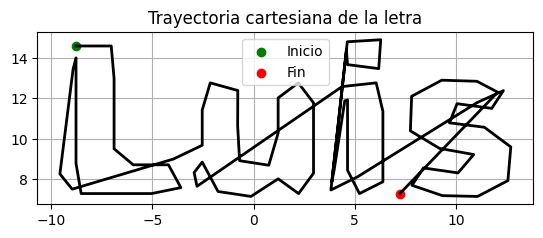

In [41]:
# Plot solo de la trayectoria
fig, ax = plt.subplots()
ax.plot(xList, yList, 'k-', linewidth=2)
ax.scatter(xList[0], yList[0], color='green', label='Inicio')
ax.scatter(xList[-1], yList[-1], color='red', label='Fin')

ax.set_aspect('equal')
ax.grid(True)
ax.set_title("Trayectoria cartesiana de la letra")
ax.legend()

plt.show()

In [42]:
qList = []
q_seed = q0  # semilla inicial

for i in range(len(xList)):
    res = minimize(IK_error, args=(np.array([xList[i], yList[i]])), x0=q_seed)
    q = res.x
    qList.append(q)
    q_seed = q  # continuidad


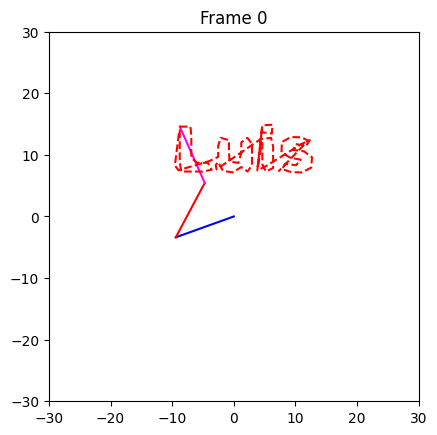

In [43]:
fig, ax = plt.subplots()

def update(i):
    ax.clear()
    plotMechanism(qList[i], ax)
    ax.plot(xList, yList, 'r--')
    ax.set_aspect('equal')
    ax.set_title(f"Frame {i}")

anim = animation.FuncAnimation(
    fig,
    update,
    frames=len(qList),
    interval=100,
    repeat=False
)

HTML(anim.to_jshtml())
